In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from helper_functions import load_huggingface_dataset, preprocess_dataframe_column
from eda import create_wordclouds_by_category
import numpy as np
import pandas as pd

import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os

from lda import runLDA

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anudeepragata/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
train_df, test_df = load_huggingface_dataset("solomonk/reddit_mental_health_posts", train_split=0.8, verbose = True)

Repo card metadata block was not found. Setting CardData to empty.


Dataset loaded: solomonk/reddit_mental_health_posts
Train size: 70909
Test size: 17778


In [4]:
train_df['body'] = train_df['body'].astype(str)

In [5]:
train_df.head()

,author,body,created_utc,id,num_comments,score,subreddit,title,upvote_ratio,url
0,Breadfan-,But in the end people only see the outside of ...,2021-12-22T02:41:23.000Z,rluy20,4,18,aspergers,It’s awful that you have to have so much stren...,0.96,https://www.reddit.com/r/aspergers/comments/rl...
2,gogo--yubari,I finally recently cut off these friendships b...,2021-12-07T23:36:59.000Z,rbcrva,4,13,ADHD,I have adhd…. But I do not like spending time ...,1.00,https://www.reddit.com/r/ADHD/comments/rbcrva/...
4,pathetic_gay_mess,I was testing this for a few days and my psych...,2021-09-28T12:54:49.000Z,px5rug,10,18,OCD,Technique aproved by my psychiatrist,0.88,https://www.reddit.com/r/OCD/comments/px5rug/t...
5,LilyWolf32,Does anyone else have trust issues regarding m...,2021-11-27T19:38:39.000Z,r3l3q4,24,88,ptsd,Dating and trauma,0.99,https://www.reddit.com/r/ptsd/comments/r3l3q4/...
6,Megan56789000,Waiting for Partial hospitalization treatment ...,2021-05-02T04:57:52.000Z,n2zgau,2,17,OCD,I hate OCD. I wish help was more quick to find...,0.96,https://www.reddit.com/r/OCD/comments/n2zgau/i...


In [6]:
train_df = preprocess_dataframe_column(train_df, 'body')

Preprocessing text in the body column...


In [7]:
train_df.head()

,author,body,created_utc,id,num_comments,score,subreddit,title,upvote_ratio,url
0,Breadfan-,end people see outside come weak nobody see wa...,2021-12-22T02:41:23.000Z,rluy20,4,18,aspergers,It’s awful that you have to have so much stren...,0.96,https://www.reddit.com/r/aspergers/comments/rl...
2,gogo--yubari,finally recently cut friendship kind shallow m...,2021-12-07T23:36:59.000Z,rbcrva,4,13,ADHD,I have adhd…. But I do not like spending time ...,1.00,https://www.reddit.com/r/ADHD/comments/rbcrva/...
4,pathetic_gay_mess,testing day psychiatrist aproved worked like t...,2021-09-28T12:54:49.000Z,px5rug,10,18,OCD,Technique aproved by my psychiatrist,0.88,https://www.reddit.com/r/OCD/comments/px5rug/t...
5,LilyWolf32,anyone else trust issue regarding men dating g...,2021-11-27T19:38:39.000Z,r3l3q4,24,88,ptsd,Dating and trauma,0.99,https://www.reddit.com/r/ptsd/comments/r3l3q4/...
6,Megan56789000,waiting partial hospitalization treatment wait...,2021-05-02T04:57:52.000Z,n2zgau,2,17,OCD,I hate OCD. I wish help was more quick to find...,0.96,https://www.reddit.com/r/OCD/comments/n2zgau/i...


Wordcloud based on subreddits

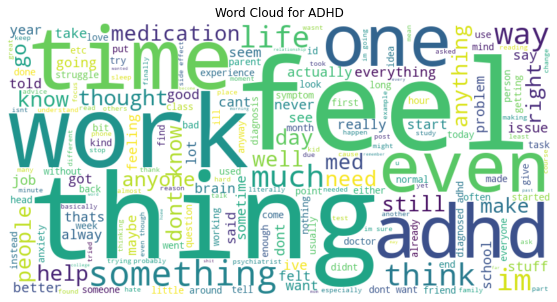

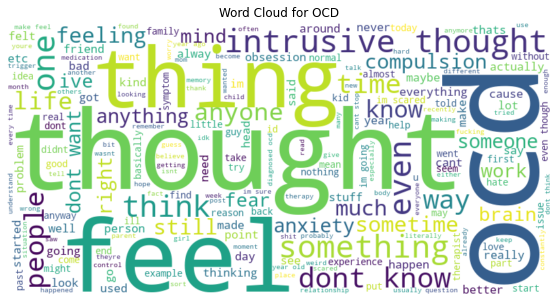

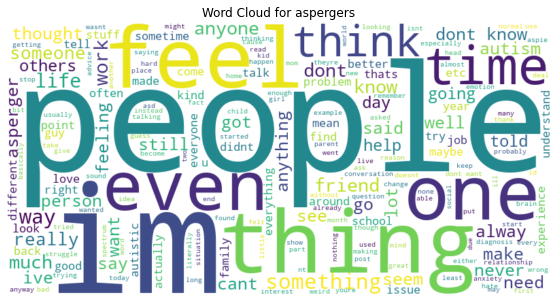

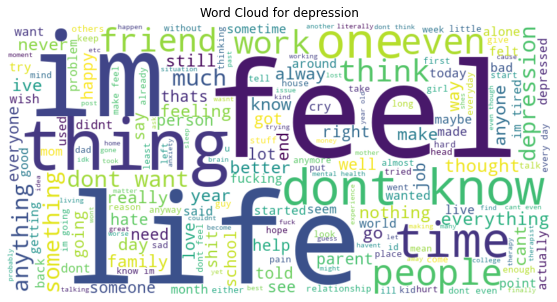

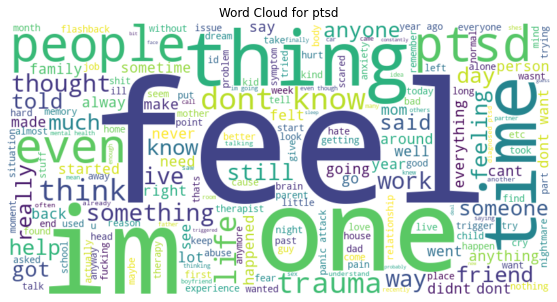

In [8]:
create_wordclouds_by_category(train_df, 'body', 'subreddit')

LDA on all posts

In [9]:
# all subreddits
data = train_df['body'].values.tolist()

# set number of topics to number of subreddits
num_topics = train_df['subreddit'].nunique()

# run LDA
lda_model, corpus, id2word = runLDA(data = data, subreddit = 'all', num_topics = num_topics)

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(f'lda_results/ldavis_prepared_all_'+str(num_topics))

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, f'lda_results/ldavis_prepared_all_'+ str(num_topics) +'.html')

LDAvis_prepared

[(0,
  '0.010*"im" + 0.008*"time" + 0.008*"thing" + 0.008*"like" + 0.007*"people" + '
  '0.007*"even" + 0.006*"know" + 0.006*"would" + 0.006*"one" + 0.006*"want"'),
 (1,
  '0.016*"like" + 0.015*"im" + 0.012*"get" + 0.011*"feel" + 0.009*"ive" + '
  '0.007*"time" + 0.007*"thing" + 0.007*"really" + 0.006*"dont" + '
  '0.006*"year"'),
 (2,
  '0.024*"im" + 0.017*"like" + 0.014*"dont" + 0.012*"feel" + 0.010*"thing" + '
  '0.008*"get" + 0.008*"want" + 0.008*"time" + 0.007*"know" + 0.007*"even"'),
 (3,
  '0.022*"im" + 0.019*"like" + 0.014*"know" + 0.013*"feel" + 0.012*"dont" + '
  '0.009*"ive" + 0.009*"thought" + 0.007*"year" + 0.006*"cant" + 0.006*"even"'),
 (4,
  '0.024*"im" + 0.013*"like" + 0.013*"feel" + 0.012*"dont" + 0.010*"time" + '
  '0.010*"ive" + 0.010*"get" + 0.009*"know" + 0.007*"ocd" + 0.007*"really"')]


/Users/anudeepragata/miniforge3/envs/ballers/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/anudeepragata/miniforge3/envs/ballers/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/anudeepragata/miniforge3/envs/ballers/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/anudeepragata/miniforge3/envs/ballers/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.011635  0.004294       1        1  29.319023
2      0.000565  0.008741       2        1  20.548104
0      0.020684  0.000938       3        1  17.585618
1      0.000113 -0.011208       4        1  16.337576
3     -0.009727 -0.002765       5        1  16.209679, topic_info=       Term           Freq          Total Category  logprob  loglift
54     like   85807.000000   85807.000000  Default  30.0000  30.0000
45       im  117594.000000  117594.000000  Default  29.0000  29.0000
51     know   49074.000000   49074.000000  Default  28.0000  28.0000
32     dont   61088.000000   61088.000000  Default  27.0000  27.0000
6       get   50056.000000   50056.000000  Default  26.0000  26.0000
..      ...            ...            ...      ...      ...      ...
56     make    3886.900778   27852.161959   Topic5  -5.5195  -0.1497
19     also    3519.746000   22352.753661   Topic5  -5.6187  -0.0290
138  really    4205.216217   36542.799828   Topic5  -5.4408  -0.3426
11   people    4081.287635   35482.449429   Topic5  -5.4707  -0.3431
277   would    3794.107096   31936.837849   Topic5  -5.5437  -0.3107

[474 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
43369      1  0.812485  aaaand
4950       1  0.223050   aaron
4950       3  0.737780   aaron
4950       4  0.034315   aaron
4950       5  0.008579   aaron
...      ...       ...     ...
411        3  0.137958    year
411        4  0.178913    year
411        5  0.213074    year
31178      1  0.841142   yorke
28435      4  0.773951   zyban

[1068 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 1, 2, 4])

LDA on subreddits

In [10]:
train_df['subreddit'].unique()

array(['aspergers', 'ADHD', 'OCD', 'ptsd', 'depression'], dtype=object)

LDA on `r/aspergers`

In [11]:
# all subreddits
data = train_df[train_df['subreddit'] == 'aspergers']['body'].values.tolist()

# set number of topics to number of subreddits
num_topics = train_df['subreddit'].nunique()

# run LDA
lda_model, corpus, id2word = runLDA(data = data, subreddit = 'aspergers', num_topics = 10)

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(f'lda_results/ldavis_prepared_aspergers_'+str(num_topics))

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, f'lda_results/ldavis_prepared_aspergers_'+ str(num_topics) +'.html')

LDAvis_prepared

[(0,
  '0.021*"im" + 0.017*"like" + 0.012*"people" + 0.012*"dont" + 0.011*"know" + '
  '0.010*"feel" + 0.008*"thing" + 0.007*"think" + 0.007*"ive" + 0.006*"get"'),
 (1,
  '0.017*"im" + 0.015*"like" + 0.011*"people" + 0.010*"feel" + 0.010*"dont" + '
  '0.009*"time" + 0.008*"even" + 0.007*"know" + 0.007*"one" + 0.007*"thing"'),
 (2,
  '0.020*"im" + 0.011*"know" + 0.010*"people" + 0.010*"like" + 0.009*"dont" + '
  '0.008*"one" + 0.008*"really" + 0.008*"time" + 0.007*"thing" + 0.006*"ive"'),
 (3,
  '0.011*"im" + 0.010*"would" + 0.009*"like" + 0.008*"dont" + 0.008*"get" + '
  '0.008*"thing" + 0.008*"feel" + 0.007*"one" + 0.006*"time" + 0.006*"even"'),
 (4,
  '0.022*"im" + 0.019*"like" + 0.011*"people" + 0.010*"dont" + 0.009*"thing" + '
  '0.009*"time" + 0.009*"feel" + 0.008*"really" + 0.008*"also" + 0.007*"ive"'),
 (5,
  '0.017*"im" + 0.014*"like" + 0.011*"people" + 0.010*"get" + 0.009*"dont" + '
  '0.008*"feel" + 0.007*"ive" + 0.006*"much" + 0.006*"never" + 0.006*"know"'),
 (6,
  '0.015*"l

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.003767  0.002353       1        1  18.638639
4     -0.008699  0.000735       2        1  16.110214
6     -0.002746  0.000175       3        1  14.207626
9     -0.003535 -0.000948       4        1  11.125923
0     -0.009675  0.003059       5        1  10.925306
8     -0.006820  0.009280       6        1   9.789374
2     -0.002625 -0.005782       7        1   7.463807
5     -0.001493  0.006128       8        1   5.629168
3      0.005786 -0.021695       9        1   4.348969
7      0.033574  0.006695      10        1   1.760976, topic_info=       Term          Freq         Total Category  logprob  loglift
28       im  14398.000000  14398.000000  Default  30.0000  30.0000
96     like  13163.000000  13163.000000  Default  29.0000  29.0000
11   people   9685.000000   9685.000000  Default  28.0000  28.0000
59    would   4510.000000   4510.000000  Default  27.0000  27.0000
100    much   3149.000000   3149.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
23     even     59.402868   4955.082513  Topic10  -5.5454  -0.3845
46   really     59.341867   5115.192961  Topic10  -5.5464  -0.4174
31      ive     56.764969   5636.800643  Topic10  -5.5908  -0.5589
37     make     49.480700   4362.998058  Topic10  -5.7282  -0.4400
236   never     45.804634   2975.577614  Topic10  -5.8053  -0.1345

[850 rows x 6 columns], token_table=       Topic      Freq             Term
term                                   
1308       9  0.624684  aaaaaaaactuaaal
21688      1  0.617434              aac
21688      3  0.154359              aac
21688      4  0.154359              aac
346        1  0.280446             able
...      ...       ...              ...
1183      10  0.011853            youre
20540      9  0.624657        youselves
16757      9  0.624497            zener
19698      2  0.315462         zeppelin
19698      8  0.315462         zeppelin

[2160 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 7, 10, 1, 9, 3, 6, 4, 8])

LDA on `r/ADHD`

In [13]:
# all subreddits
data = train_df[train_df['subreddit'] == 'ADHD']['body'].values.tolist()

# set number of topics to number of subreddits
num_topics = train_df['subreddit'].nunique()

# run LDA
lda_model, corpus, id2word = runLDA(data = data, subreddit = 'ADHD', num_topics = 10)

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(f'lda_results/ldavis_prepared_ADHD_'+str(num_topics))

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, f'lda_results/ldavis_prepared_ADHD_'+ str(num_topics) +'.html')

LDAvis_prepared

[(0,
  '0.011*"thing" + 0.010*"adhd" + 0.009*"like" + 0.008*"time" + 0.006*"im" + '
  '0.006*"know" + 0.006*"one" + 0.006*"really" + 0.006*"year" + '
  '0.006*"something"'),
 (1,
  '0.018*"like" + 0.014*"im" + 0.012*"adhd" + 0.010*"feel" + 0.009*"thing" + '
  '0.009*"get" + 0.009*"time" + 0.008*"day" + 0.007*"know" + 0.007*"really"'),
 (2,
  '0.016*"im" + 0.014*"like" + 0.012*"time" + 0.012*"adhd" + 0.011*"feel" + '
  '0.009*"get" + 0.009*"ive" + 0.009*"thing" + 0.008*"day" + 0.008*"dont"'),
 (3,
  '0.024*"im" + 0.013*"get" + 0.011*"like" + 0.010*"adhd" + 0.010*"feel" + '
  '0.009*"really" + 0.009*"thing" + 0.008*"ive" + 0.008*"dont" + 0.007*"day"'),
 (4,
  '0.021*"im" + 0.012*"like" + 0.011*"ive" + 0.011*"get" + 0.011*"adhd" + '
  '0.010*"time" + 0.010*"feel" + 0.009*"dont" + 0.009*"thing" + 0.007*"work"'),
 (5,
  '0.013*"im" + 0.013*"adhd" + 0.012*"like" + 0.010*"ive" + 0.008*"get" + '
  '0.006*"week" + 0.006*"med" + 0.006*"feel" + 0.006*"one" + 0.005*"even"'),
 (6,
  '0.015*"im" + 0

/Users/anudeepragata/miniforge3/envs/ballers/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/anudeepragata/miniforge3/envs/ballers/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/anudeepragata/miniforge3/envs/ballers/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/anudeepragata/miniforge3/envs/ballers/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (v

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.010072  0.002244       1        1  17.505401
8      0.009659  0.006176       2        1  16.682743
6      0.005200  0.004628       3        1  13.736737
3      0.011660  0.002470       4        1  12.911821
9      0.009439  0.000684       5        1  12.679835
1      0.004103  0.003683       6        1  12.253473
2      0.001228  0.004175       7        1   6.641616
5      0.002720 -0.013100       8        1   5.885467
7     -0.011633 -0.019194       9        1   1.163013
0     -0.042448  0.008233      10        1   0.539895, topic_info=      Term          Freq         Total Category  logprob  loglift
2     adhd  17272.000000  17272.000000  Default  30.0000  30.0000
70   thing  12287.000000  12287.000000  Default  29.0000  29.0000
147   time  13336.000000  13336.000000  Default  28.0000  28.0000
40    like  21212.000000  21212.000000  Default  27.0000  27.0000
31      im  32396.000000  32396.000000  Default  26.0000  26.0000
..     ...           ...           ...      ...      ...      ...
31      im     52.370049  32396.862660  Topic10  -5.0961  -1.2059
308   need     26.330676   5903.311728  Topic10  -5.7837  -0.1910
437   week     24.882464   4852.459089  Topic10  -5.8402  -0.0515
134    ive     28.575891  13218.871835  Topic10  -5.7018  -0.9153
280   cant     25.616624   7615.021710  Topic10  -5.8112  -0.4731

[802 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
32102      2  0.430425  aaaarrgghh
32102      9  0.430425  aaaarrgghh
562        1  0.203902        able
562        2  0.131184        able
562        3  0.081154        able
...      ...       ...         ...
33489      1  0.842827   youtubetv
32587      3  0.631963        yust
32587      9  0.210654        yust
6895       2  0.328986   zillionth
6895       9  0.328986   zillionth

[1849 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 7, 4, 10, 2, 3, 6, 8, 1])

LDA on `r/OCD`

In [14]:
# all subreddits
data = train_df[train_df['subreddit'] == 'OCD']['body'].values.tolist()

# set number of topics to number of subreddits
num_topics = train_df['subreddit'].nunique()

# run LDA
lda_model, corpus, id2word = runLDA(data = data, subreddit = 'OCD', num_topics = 10)

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(f'lda_results/ldavis_prepared_OCD_'+str(num_topics))

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, f'lda_results/ldavis_prepared_OCD_'+ str(num_topics) +'.html')

LDAvis_prepared

[(0,
  '0.015*"thought" + 0.015*"like" + 0.013*"ocd" + 0.011*"dont" + 0.010*"im" + '
  '0.008*"think" + 0.008*"would" + 0.008*"thing" + 0.008*"also" + '
  '0.008*"feel"'),
 (1,
  '0.022*"im" + 0.015*"thought" + 0.012*"like" + 0.011*"dont" + 0.010*"feel" + '
  '0.010*"time" + 0.010*"ocd" + 0.010*"even" + 0.008*"would" + 0.008*"know"'),
 (2,
  '0.023*"ocd" + 0.022*"like" + 0.017*"im" + 0.015*"feel" + 0.015*"thought" + '
  '0.011*"ive" + 0.010*"get" + 0.009*"time" + 0.009*"know" + 0.009*"dont"'),
 (3,
  '0.023*"im" + 0.016*"like" + 0.014*"thing" + 0.013*"ocd" + 0.012*"feel" + '
  '0.011*"thought" + 0.009*"know" + 0.009*"ive" + 0.008*"dont" + 0.008*"time"'),
 (4,
  '0.020*"ocd" + 0.017*"im" + 0.015*"like" + 0.015*"feel" + 0.012*"dont" + '
  '0.010*"know" + 0.009*"thought" + 0.009*"even" + 0.008*"time" + 0.008*"get"'),
 (5,
  '0.022*"like" + 0.015*"im" + 0.014*"ocd" + 0.012*"dont" + 0.011*"feel" + '
  '0.010*"thing" + 0.010*"thought" + 0.008*"even" + 0.008*"think" + '
  '0.007*"know"'),
 (6

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.006648  0.002993       1        1  22.286773
1     -0.003648  0.004185       2        1  16.533525
5     -0.000758 -0.000553       3        1  12.459689
6     -0.006952  0.005753       4        1  11.897988
7     -0.010993 -0.003336       5        1  10.659716
4     -0.004133 -0.004636       6        1   7.328681
3     -0.004143  0.001035       7        1   7.152482
8      0.008732  0.000117       8        1   5.709503
9      0.010858 -0.017639       9        1   3.238759
0      0.017686  0.012082      10        1   2.732884, topic_info=          Term          Freq         Total Category  logprob  loglift
103         im  31637.000000  31637.000000  Default  30.0000  30.0000
110        ocd  24147.000000  24147.000000  Default  29.0000  29.0000
41        like  24932.000000  24932.000000  Default  28.0000  28.0000
276    thought  19749.000000  19749.000000  Default  27.0000  27.0000
201      thing  12459.000000  12459.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
38        know    221.719900  13135.491238  Topic10  -5.2444  -0.4818
161       even    191.565591   9997.386282  Topic10  -5.3906  -0.3550
27       going    140.827112   5431.249702  Topic10  -5.6983  -0.0526
58      really    171.487017   9709.735971  Topic10  -5.5013  -0.4366
65   something    144.702318   8517.480378  Topic10  -5.6711  -0.4754

[843 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
5617       3  0.712883    accusate
341        1  0.294262    actually
341        2  0.112969    actually
341        3  0.090984    actually
341        4  0.090984    actually
...      ...       ...         ...
208        8  0.045148        year
208        9  0.033357        year
208       10  0.021255        year
28028      7  0.543605     youhave
16723      6  0.785852  zoophiliia

[2078 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 6, 7, 8, 5, 4, 9, 10, 1])

LDA on `r/ptsd`

In [15]:
# all subreddits
data = train_df[train_df['subreddit'] == 'ptsd']['body'].values.tolist()

# set number of topics to number of subreddits
num_topics = train_df['subreddit'].nunique()

# run LDA
lda_model, corpus, id2word = runLDA(data = data, subreddit = 'ptsd', num_topics = 10)

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(f'lda_results/ldavis_prepared_ptsd_'+str(num_topics))

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, f'lda_results/ldavis_prepared_ptsd_'+ str(num_topics) +'.html')

LDAvis_prepared

[(0,
  '0.020*"im" + 0.013*"dont" + 0.010*"know" + 0.010*"like" + 0.010*"get" + '
  '0.009*"ive" + 0.009*"feel" + 0.007*"time" + 0.007*"want" + 0.007*"ptsd"'),
 (1,
  '0.019*"im" + 0.016*"like" + 0.012*"time" + 0.012*"feel" + 0.009*"get" + '
  '0.007*"dont" + 0.007*"know" + 0.007*"want" + 0.007*"really" + 0.006*"even"'),
 (2,
  '0.011*"im" + 0.011*"feel" + 0.009*"like" + 0.007*"dont" + 0.007*"ptsd" + '
  '0.007*"ive" + 0.006*"year" + 0.006*"time" + 0.006*"trauma" + 0.006*"even"'),
 (3,
  '0.020*"like" + 0.018*"im" + 0.013*"feel" + 0.010*"dont" + 0.010*"get" + '
  '0.009*"ptsd" + 0.007*"know" + 0.007*"one" + 0.007*"even" + 0.007*"time"'),
 (4,
  '0.021*"im" + 0.012*"feel" + 0.010*"dont" + 0.009*"like" + 0.009*"year" + '
  '0.008*"get" + 0.007*"would" + 0.007*"want" + 0.007*"time" + 0.007*"know"'),
 (5,
  '0.019*"im" + 0.014*"ive" + 0.009*"dont" + 0.008*"feel" + 0.008*"really" + '
  '0.008*"ptsd" + 0.007*"like" + 0.007*"year" + 0.007*"get" + 0.007*"know"'),
 (6,
  '0.016*"like" + 0.014*"

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.007515 -0.002420       1        1  18.508271
3      0.005703  0.002064       2        1  18.445748
4      0.004979 -0.001114       3        1  14.820002
1      0.006355 -0.001050       4        1  14.608050
5      0.003778 -0.007660       5        1  11.135672
6      0.000145  0.004898       6        1   8.993740
0      0.004883 -0.002423       7        1   4.770762
7     -0.003731  0.015482       8        1   4.435846
2     -0.015345 -0.005064       9        1   2.672765
9     -0.014281 -0.002713      10        1   1.609144, topic_info=      Term          Freq         Total Category  logprob  loglift
53    dont   9930.000000   9930.000000  Default  30.0000  30.0000
19      im  19394.000000  19394.000000  Default  29.0000  29.0000
71    know   8954.000000   8954.000000  Default  28.0000  28.0000
309   like  14409.000000  14409.000000  Default  27.0000  27.0000
21     ive   7510.000000   7510.000000  Default  26.0000  26.0000
..     ...           ...           ...      ...      ...      ...
103  would     71.697724   5926.673209  Topic10  -5.4923  -0.2853
25     one     67.863432   5735.996547  Topic10  -5.5472  -0.3076
34    want     67.367821   6227.745792  Topic10  -5.5546  -0.3971
433   cant     60.025767   5627.539858  Topic10  -5.6700  -0.4112
332  never     56.255250   3931.409088  Topic10  -5.7348  -0.1174

[831 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
496        1  0.225655  abuse
496        2  0.176000  abuse
496        3  0.122483  abuse
496        4  0.144000  abuse
496        5  0.087173  abuse
...      ...       ...    ...
18247      6  0.561616    yoy
10678      1  0.118190  zebra
10678      2  0.118190  zebra
10678      3  0.590951  zebra
10678      7  0.118190  zebra

[1917 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 4, 5, 2, 6, 7, 1, 8, 3, 10])

LDA on `r/depression`

In [16]:
# all subreddits
data = train_df[train_df['subreddit'] == 'depression']['body'].values.tolist()

# set number of topics to number of subreddits
num_topics = train_df['subreddit'].nunique()

# run LDA
lda_model, corpus, id2word = runLDA(data = data, subreddit = 'depression', num_topics = 10)

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(f'lda_results/ldavis_prepared_depression_'+str(num_topics))

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, f'lda_results/ldavis_prepared_depression_'+ str(num_topics) +'.html')

LDAvis_prepared

[(0,
  '0.035*"im" + 0.017*"dont" + 0.015*"want" + 0.015*"like" + 0.013*"feel" + '
  '0.009*"know" + 0.009*"cant" + 0.008*"life" + 0.008*"time" + 0.008*"really"'),
 (1,
  '0.020*"im" + 0.019*"feel" + 0.018*"like" + 0.014*"dont" + 0.010*"life" + '
  '0.009*"want" + 0.009*"get" + 0.009*"ive" + 0.009*"day" + 0.008*"know"'),
 (2,
  '0.011*"im" + 0.011*"feel" + 0.010*"get" + 0.009*"want" + 0.009*"like" + '
  '0.008*"thing" + 0.008*"go" + 0.007*"life" + 0.007*"dont" + 0.007*"time"'),
 (3,
  '0.027*"im" + 0.021*"feel" + 0.015*"life" + 0.015*"dont" + 0.014*"like" + '
  '0.010*"even" + 0.008*"get" + 0.008*"thing" + 0.008*"know" + 0.008*"want"'),
 (4,
  '0.021*"im" + 0.018*"like" + 0.016*"dont" + 0.014*"want" + 0.014*"know" + '
  '0.011*"feel" + 0.011*"people" + 0.009*"cant" + 0.009*"get" + 0.008*"thing"'),
 (5,
  '0.036*"im" + 0.017*"dont" + 0.015*"feel" + 0.013*"like" + 0.012*"time" + '
  '0.010*"know" + 0.010*"life" + 0.010*"want" + 0.010*"ive" + 0.009*"cant"'),
 (6,
  '0.026*"dont" + 0.016*"

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.002867  0.001476       1        1  26.392846
5      0.013785 -0.000360       2        1  16.576865
0      0.009453  0.001573       3        1  13.776646
4      0.008165  0.000636       4        1  11.180997
3      0.007298 -0.002082       5        1   9.379076
1      0.001997 -0.000918       6        1   8.287419
8      0.001141 -0.006059       7        1   6.975806
6     -0.002130  0.007532       8        1   4.122770
2     -0.021927  0.012914       9        1   2.088480
9     -0.020650 -0.014713      10        1   1.219094, topic_info=       Term          Freq         Total Category  logprob  loglift
26       im  23196.000000  23196.000000  Default  30.0000  30.0000
84     dont  13800.000000  13800.000000  Default  29.0000  29.0000
34     like  14281.000000  14281.000000  Default  28.0000  28.0000
20     feel  14472.000000  14472.000000  Default  27.0000  27.0000
30      ive   7735.000000   7735.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
13     even     56.677468   7182.141777  Topic10  -5.2824  -0.4349
170  people     50.055609   5587.136196  Topic10  -5.4066  -0.3080
208    want     59.618622   8918.425463  Topic10  -5.2318  -0.6008
354     one     45.419556   5246.586184  Topic10  -5.5038  -0.3423
102    year     47.025426   6358.427814  Topic10  -5.4691  -0.4998

[821 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
17613      1  0.268658      aba
17613      2  0.268658      aba
17613      6  0.537316      aba
18399      6  0.589038  ablated
611        1  0.222966     able
...      ...       ...      ...
23634      7  0.622494   yippie
12349      8  0.660209   yourre
19702      5  0.579046     yumi
16250      6  0.588812    zeroi
15580      5  0.378583       zu

[1887 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 6, 1, 5, 4, 2, 9, 7, 3, 10])